# 3.6 決定木学習
- 意味解釈可能性に配慮する場合に魅力的なモデルである。
- 一連の質問に基づいて決断を下すという方法により、データ分類するモデルである。
- 葉が純粋になるまで分割を繰り返すと多くのノードを持つ深い決定木になることがあり、過学習に陥りやすくなる。

# 3.6.1　情報利得の最大化：できるだけ高い効果を得る
- 分割毎に情報利得が最大となるように定式化した目的関数を定義する。
$$IG(D_{p},f) = I(D_{p})-\sum^{m}_{j=1} \frac{N_{j}}{N_{p}} I(D_{j})$$
- $f$は分割を行う特徴量、$D_{p}$は親のデータ・セット、$D_{j}$は$j$番目の子ノードのデータ・セット
- $I$は不純度を数値化したものである。ノードの不順度は異なるクラスのサンプルがどの程度の割合で混ざっているかを定量化する指標である。
- $N_{p}$は親ノードのサンプル総数、$N_{j}$は$j$番目の子ノードのサンプルの個数
- 情報利得は親ノードの不純度と子ノードの不純度の合計との差である。つまり、子ノードの不純度が低いほど、情報利得は大きくなる
- 以下二分決定木で話をすすめる

$$IG(D_{p},f) = I(D_{p}) - \frac{N_{left}}{N_{p}}I(D_{left})-\frac{N_{right}}{N_{p}}I(D_{right})$$

- 二分決定木でよく使用される不純度の指標または分割条件は、ジニ不純度$I_{G}$、エントロピー$I_{H}$、分類誤差$I_{E}$の３つである。
$$I_{H}(t) = -\sum^{c}_{i=1}p(i|t)log_{2}p(i|t)$$
- $p(i|t)$は、特定のノード$t$においてクラス$i$に属するサンプルの割合を表す。ノードのサンプルがすべて同じ場合は0
- エントロピーが最大になるのは、各クラスが一様に分布している時である。
- エントロピーは相互情報量（２つの確率の相互依存度）が最大化するように試みる条件である。？？？？

- ジニ不純度については、直感的に、誤分類の確率を最小化する条件であると解釈できる
$$I_{G}(t) = \sum^{c}_{i=1}p(i|t)(1-p(i|t))=1-\sum^{c}_{i=1}p(i|t)^{2}$$
- ジニ不純度が最大になるのは、クラスが完全に混合されている場合である。
- ジニ不純度とエントロピーは非常によく似た結果となるのが一般的であるため、異なる不純度で条件を使ってモデルを評価するのは時間の無駄である。

$$I_{E}(t)=1-max\{p(i|t)\}$$
- 分類誤差は剪定には役に立つが、ノードのクラス確率には鈍いため、決定木を成長させるのには適していない

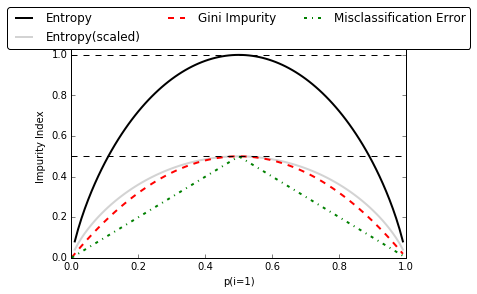

In [9]:
#３種類の不純度条件を視覚的に比較する
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#ジニ不純度の関数を定義
def gini(p):
    return (p) * (1 - (p)) + (1 - p)*(1 - (1 - p))

#エントロピーの関数を定義
def entropy(p):
    return -p*np.log2(p) - (1 - p) * np.log2((1 - p))

#分類誤差の関数を定義
def error(p):
    return 1 - np.max([p, 1-p])

#確率を表す配列の生成（0から0.99まで0.01刻み）
x = np.arange(0.0,1.0,0.01)
#配列の値をもとにエントロピー、分類誤差を計算
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent] #エントロピーに0.5かけたやつ
err = [error(i) for i in x]
#図の作成を開始
fig = plt.figure()
ax = plt.subplot(111)
#エントロピー（２種）、ジニ不純度、分類誤差のそれぞれをループ処理
for i,lab,ls,c, in zip([ent,sc_ent,gini(x),err],
                      ['Entropy','Entropy(scaled)','Gini Impurity','Misclassification Error'],
                      ['-','-','--','-.'],
                      ['black','lightgray','red','green']):
    line = ax.plot(x,i,label=lab,linestyle=ls,lw=2,color=c)

ax.legend(loc='upper center',bbox_to_anchor=(0.5,1.15),ncol=3,fancybox=True,shadow=False)
#2本の水平の破線を引く
ax.axhline(y=0.5,linewidth=1,color='k',linestyle='--')
ax.axhline(y=1.0,linewidth=1,color='k',linestyle='--')
#横軸の上限/下限を設定
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()